In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
import pandas as pd
from cfr import task
from wikivector import vector
from cymr import network
from mindstorm import dsmplot

In [2]:
h5_file = '/Users/morton/Dropbox/work/wikivector/use_cfr.hdf5'
patterns_file = '/Users/morton/Dropbox/work/cmr_cfr/cfr/cfr_patterns.hdf5'
data_dir = '/Users/morton/Dropbox/data/cfr'
fig_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr/figs/patterns'
pool_file = os.path.join(data_dir, 'pool_cfr.csv')
image_dir = os.path.join(data_dir, 'pool_lores')
data_file = os.path.join(data_dir, 'cfr_eeg_mixed.csv')

In [3]:
vectors, items = vector.load_vectors(h5_file)
patterns = network.load_patterns(patterns_file)
pool = pd.read_csv(pool_file)
data = pd.read_csv(data_file)

In [4]:
images = task.load_pool_images(pool, image_dir)

In [5]:
study_data = data.loc[data['trial_type'] == 'study']
data_items = sorted(study_data['item'].unique())
pool_items = pool['item'].str.upper().to_numpy()
sem_items = items

In [6]:
np.testing.assert_array_equal(sem_items, pool_items)

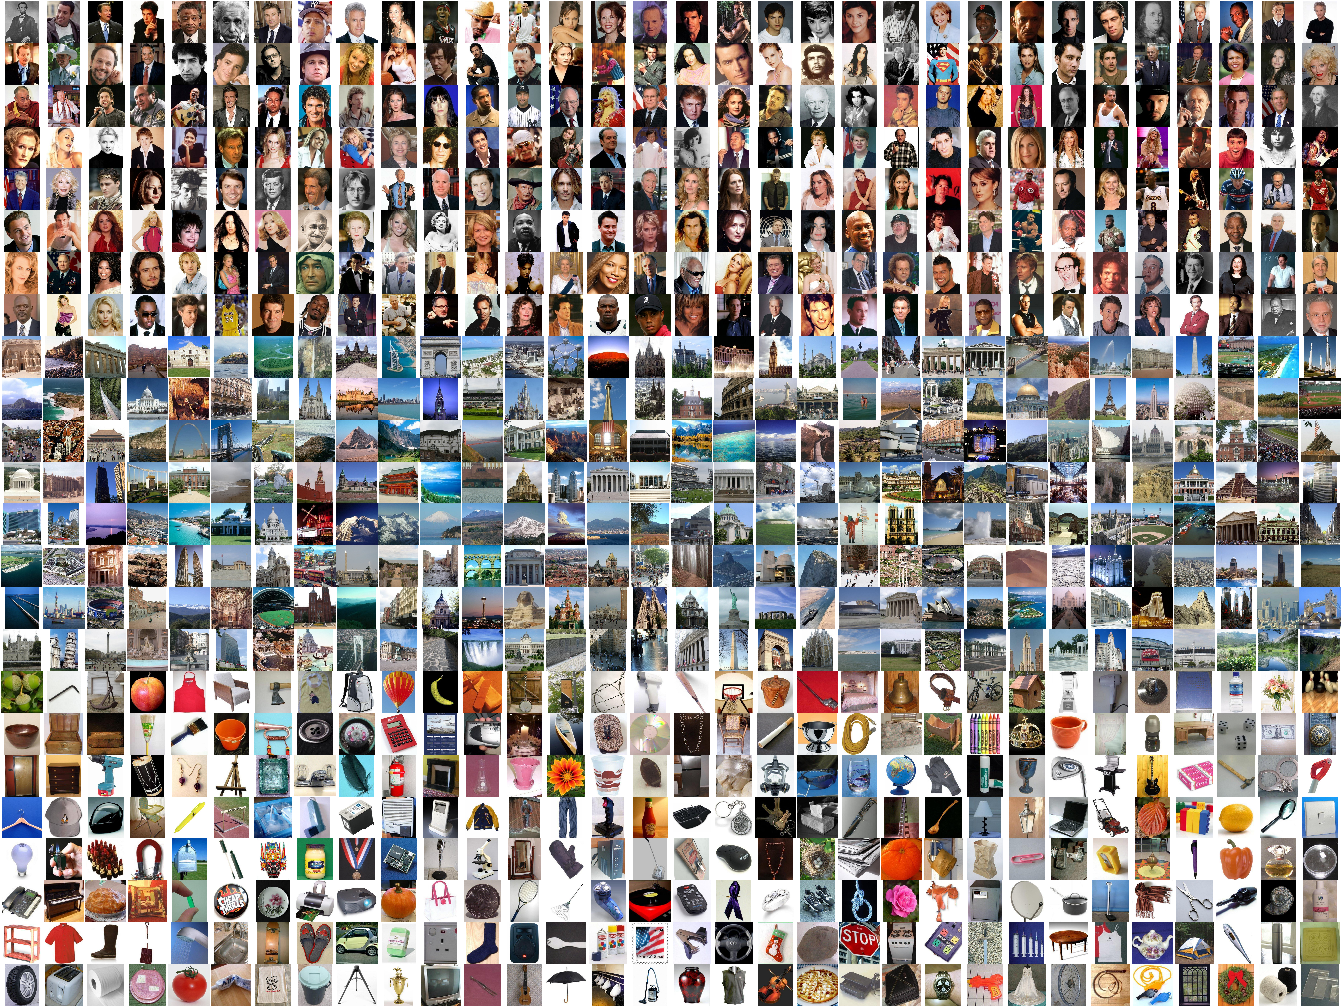

In [7]:
mat = dsmplot.image_matrix(list(images.values()), shape=(24, 32))
fig, ax = plt.subplots(figsize=(24, 32))
ax.imshow(mat)
ax.set_axis_off()
fig.savefig(os.path.join(fig_dir, f'stim_matrix.png'), pad_inches=0)

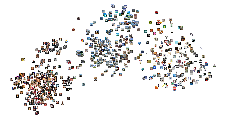

In [8]:
from sklearn import manifold
all_images = list(images.values())
embedding = manifold.TSNE(
    n_components=2, perplexity=100, n_iter=5000, n_iter_without_progress=500
)
X = embedding.fit_transform(vectors)
fig, ax = plt.subplots(figsize=(4, 4))
dsmplot.plot_mds(X.T, all_images, zoom=0.01, ax=ax, embedding='precomputed');
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(os.path.join(fig_dir, f'stim_mds.png'), dpi=1200, pad_inches=0)

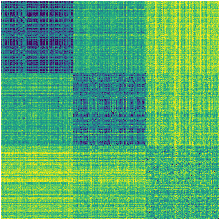

In [10]:
fig, ax = plt.subplots(figsize=(4, 4));
dsm_use = sd.squareform(sd.pdist(vectors, 'correlation'))
dsmplot.plot_dsm(dsm_use, ax=ax);
fig.savefig(os.path.join(data_dir, f'rdm_use.png'), pad_inches=0)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4));
rsaplot.plot_mds(dsm_use, list(images.values()), ax=ax, zoom=.05);
ax.set_axis_off()
ax.set_aspect('equal')
fig.savefig(os.path.join(data_dir, 'mds_use.png'), pad_inches=0, dpi=300)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4));
item_groups = {'cel': slice(None, 256), 
               'loc': slice(256, 512), 
               'obj': slice(512, None)}
for name, ind in item_groups.items():
    ax.clear()
    rsaplot.plot_mds(dsm_use, list(images.values()), ax=ax, zoom=.05, ind=ind);
    ax.set_axis_off()
    ax.set_aspect('equal')
    fig.savefig(os.path.join(data_dir, f'mds_use_{name}.png'), pad_inches=0, dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4));
for name, ind in item_groups.items():
    ax.clear()
    rsaplot.plot_mds(dsm_w2v, list(images.values()), ax=ax, zoom=.05, ind=ind);
    ax.set_axis_off()
    ax.set_aspect('equal')
    fig.savefig(os.path.join(data_dir, f'mds_w2v_{name}.png'), pad_inches=0, dpi=600)